# Analysis of % of High Schools with a Foundational Computer Science Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

df = pd.read_csv('StatePoliciesWithDemographic2.csv')
print (df.head())

  StateAbbv   StateName P1_StatePlan P2_Standards P3_Funding P4_Certification  \
0        AK      Alaska           No          Yes         No               No   
1        AL     Alabama  In progress          Yes        Yes              Yes   
2        AR    Arkansas          Yes          Yes        Yes              Yes   
3        AZ     Arizona           No          Yes        Yes              Yes   
4        CA  California          Yes          Yes        Yes              Yes   

  P5_PreserviceIncentives P6_StateCSposition P7_RequireHStoOffer  \
0                      No                 No                  No   
1                     Yes                Yes                 Yes   
2                     Yes                Yes                 Yes   
3                      No        In Progress                  No   
4                      No                 No                  No   

     P8_CountGradReq  ... AP_Black  AP_HLLL  AP_Native  AP_HPI  AP_Asian  \
0  District Decision  ...   

In [2]:
df.dtypes

StateAbbv                   object
StateName                   object
P1_StatePlan                object
P2_Standards                object
P3_Funding                  object
P4_Certification            object
P5_PreserviceIncentives     object
P6_StateCSposition          object
P7_RequireHStoOffer         object
P8_CountGradReq             object
P9_HigherEdAdmission        object
PctReportedFCS             float64
YearOfLast                   int64
NumOfHS                      int64
NumHSWithCS                  int64
PctHSwFCS                  float64
TotalStudents                int64
NumStudentsinHSwCS           int64
PctStudentsHSwCS           float64
Total_Black                  int64
Total_HLLL                   int64
Total_Native                 int64
Total_HPI                    int64
Total_White                  int64
Total_Asian                  int64
Total_TwoPlus                int64
InCSHS_Black                 int64
InCSHS_HLLL                  int64
InCSHS_Native       

In [3]:
# print (df[['StateName','NumPolicies','TotalStudents','PctHSwFCS']].sort_values('PctHSwFCS',ascending=False))
df['PctHSwFCS_ZScore'] = stats.zscore(df['PctHSwFCS'])
print (df[['StateName','TotalStudents','PctHSwFCS','PctHSwFCS_ZScore']].sort_values('PctHSwFCS',ascending=False))

               StateName  TotalStudents  PctHSwFCS  PctHSwFCS_ZScore
2               Arkansas         159278   0.924837          1.979878
40        South Carolina         241394   0.921569          1.961455
20              Maryland         270650   0.900826          1.844518
39          Rhode Island          44343   0.857143          1.598247
33                Nevada         161249   0.827815          1.432905
19         Massachusetts         327368   0.824289          1.413032
6            Connecticut         169150   0.818182          1.378600
1                Alabama         262216   0.815725          1.364748
30         New Hampshire          55167   0.780000          1.163345
49         West Virginia          79972   0.761538          1.059266
44                  Utah         287198   0.744745          0.964590
15               Indiana         342616   0.742169          0.950067
45              Virginia         403527   0.732759          0.897017
11                Hawaii          

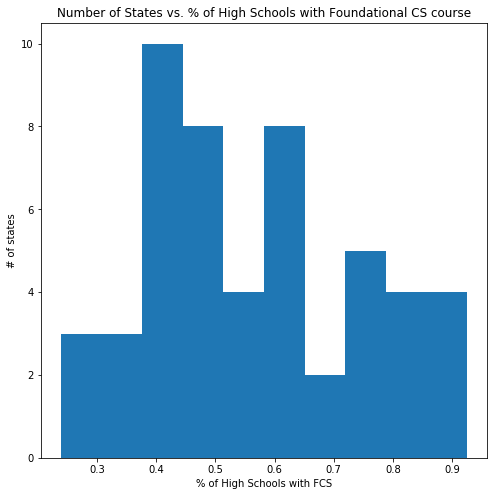

In [4]:
plt.figure(figsize=(8,8))
plt.hist(x=df['PctHSwFCS'], bins=10)
plt.xlabel("% of High Schools with FCS")
plt.ylabel("# of states")
plt.title("Number of States vs. % of High Schools with Foundational CS course")
plt.show()

In [5]:
policies = ['P1_StatePlan','P2_Standards', 'P3_Funding', 'P4_Certification', 'P5_PreserviceIncentives', 'P6_StateCSposition', 'P7_RequireHStoOffer',
'P8_CountGradReq', 'P9_HigherEdAdmission']
policiesB = ["B" + p for p in policies]

print (policiesB)


['BP1_StatePlan', 'BP2_Standards', 'BP3_Funding', 'BP4_Certification', 'BP5_PreserviceIncentives', 'BP6_StateCSposition', 'BP7_RequireHStoOffer', 'BP8_CountGradReq', 'BP9_HigherEdAdmission']


In [6]:
def makeBinary(yesno):
    if (yesno.upper() == 'YES'):
        return 1
    else:
        return 0

In [7]:
for i in range(len(policies)):
    df[policiesB[i]] = df[policies[i]].apply(lambda x:makeBinary(x))

In [8]:
df['NumPolicies']=df[policiesB].sum(axis=1)

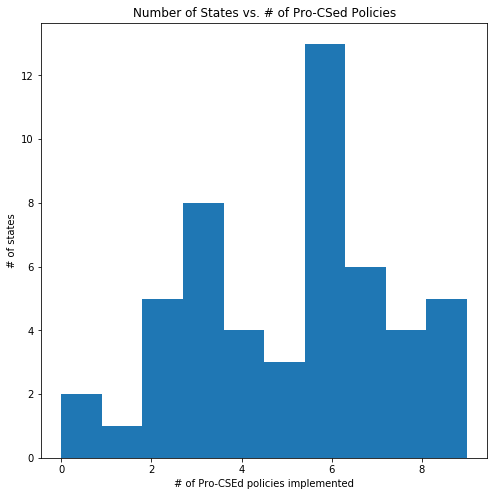

In [9]:
plt.figure(figsize=(8,8))
plt.hist(x=df['NumPolicies'], bins=10)
plt.xlabel("# of Pro-CSEd policies implemented")
plt.ylabel("# of states")
plt.title("Number of States vs. # of Pro-CSed Policies")
plt.show()

In [10]:
df.describe()

,PctReportedFCS,YearOfLast,NumOfHS,NumHSWithCS,PctHSwFCS,TotalStudents,NumStudentsinHSwCS,PctStudentsHSwCS,Total_Black,Total_HLLL,...,BP1_StatePlan,BP2_Standards,BP3_Funding,BP4_Certification,BP5_PreserviceIncentives,BP6_StateCSposition,BP7_RequireHStoOffer,BP8_CountGradReq,BP9_HigherEdAdmission,NumPolicies
count,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,51.000000,5.100000e+01,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.572941,20.647059,516.196078,264.784314,0.573646,3.264598e+05,2.536473e+05,0.775800,48364.607843,8.620975e+04,...,0.411765,0.764706,0.588235,0.803922,0.411765,0.607843,0.450980,0.705882,0.411765,5.156863
std,0.178519,0.522438,510.772357,223.091758,0.179145,3.826195e+05,2.908326e+05,0.120076,56982.990484,1.952780e+05,...,0.497050,0.428403,0.497050,0.400979,0.497050,0.493089,0.502543,0.460179,0.497050,2.444361
min,0.240000,19.000000,43.000000,16.000000,0.239677,2.082600e+04,1.058000e+04,0.450771,289.000000,5.950000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,20.000000,209.500000,102.000000,0.426800,9.273900e+04,6.911850e+04,0.708004,3966.000000,9.990500e+03,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.540000,21.000000,353.000000,227.000000,0.543735,2.413940e+05,1.743340e+05,0.771938,23651.000000,3.183000e+04,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6.000000
75%,0.725000,21.000000,636.000000,332.500000,0.725754,3.881930e+05,3.207130e+05,0.872100,81556.500000,6.679200e+04,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,0.920000,21.000000,2633.000000,1069.000000,0.924837,2.013095e+06,1.514876e+06,0.982347,211916.000000,1.087392e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [11]:
d = np.polyfit(df['NumPolicies'],df['PctHSwFCS'],1)
f = np.poly1d(d)
df['CalcRegressionA'] = f(df['NumPolicies'])
r2_policies = r2_score(df['PctHSwFCS'],df['CalcRegressionA'])
print ("Line of regression: " + str(f));
print ("R2: " + str(r2_policies))

Line of regression:  
0.04661 x + 0.3333
R2: 0.40448681449824064


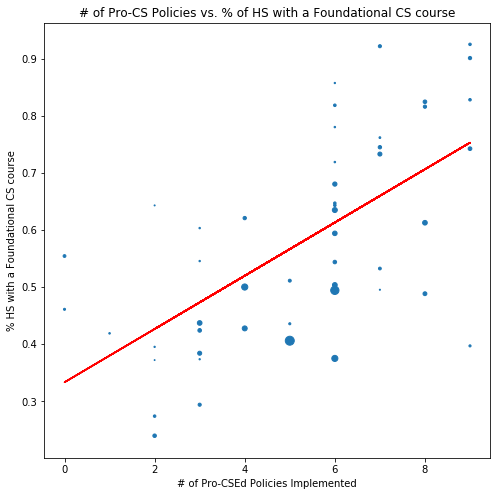

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(x=df['NumPolicies'], y=df['PctHSwFCS'], s=df['TotalStudents']/25000)
plt.plot(df['NumPolicies'], df['CalcRegressionA'], c='r')
plt.xlabel('# of Pro-CSEd Policies Implemented')
plt.ylabel('% HS with a Foundational CS course')
plt.title('# of Pro-CS Policies vs. % of HS with a Foundational CS course')
plt.show()


In [13]:
polWresults = policiesB + ['NumPolicies','PctHSwFCS']
corrWresults =df[polWresults].corr()

In [14]:
print (corrWresults)

                          BP1_StatePlan  BP2_Standards  BP3_Funding  \
BP1_StatePlan                  1.000000       0.276247     0.295238   
BP2_Standards                  0.276247       1.000000     0.287297   
BP3_Funding                    0.295238       0.287297     1.000000   
BP4_Certification              0.212501       0.308190     0.289238   
BP5_PreserviceIncentives       0.190476       0.182323     0.214286   
BP6_StateCSposition            0.427214       0.311882     0.307210   
BP7_RequireHStoOffer           0.282592       0.224047     0.197814   
BP8_CountGradReq               0.190307       0.149191     0.159447   
BP9_HigherEdAdmission          0.109524      -0.005525     0.295238   
NumPolicies                    0.587766       0.513427     0.597449   
PctHSwFCS                      0.483723       0.355255     0.385443   

                          BP4_Certification  BP5_PreserviceIncentives  \
BP1_StatePlan                      0.212501                  0.190476   
B

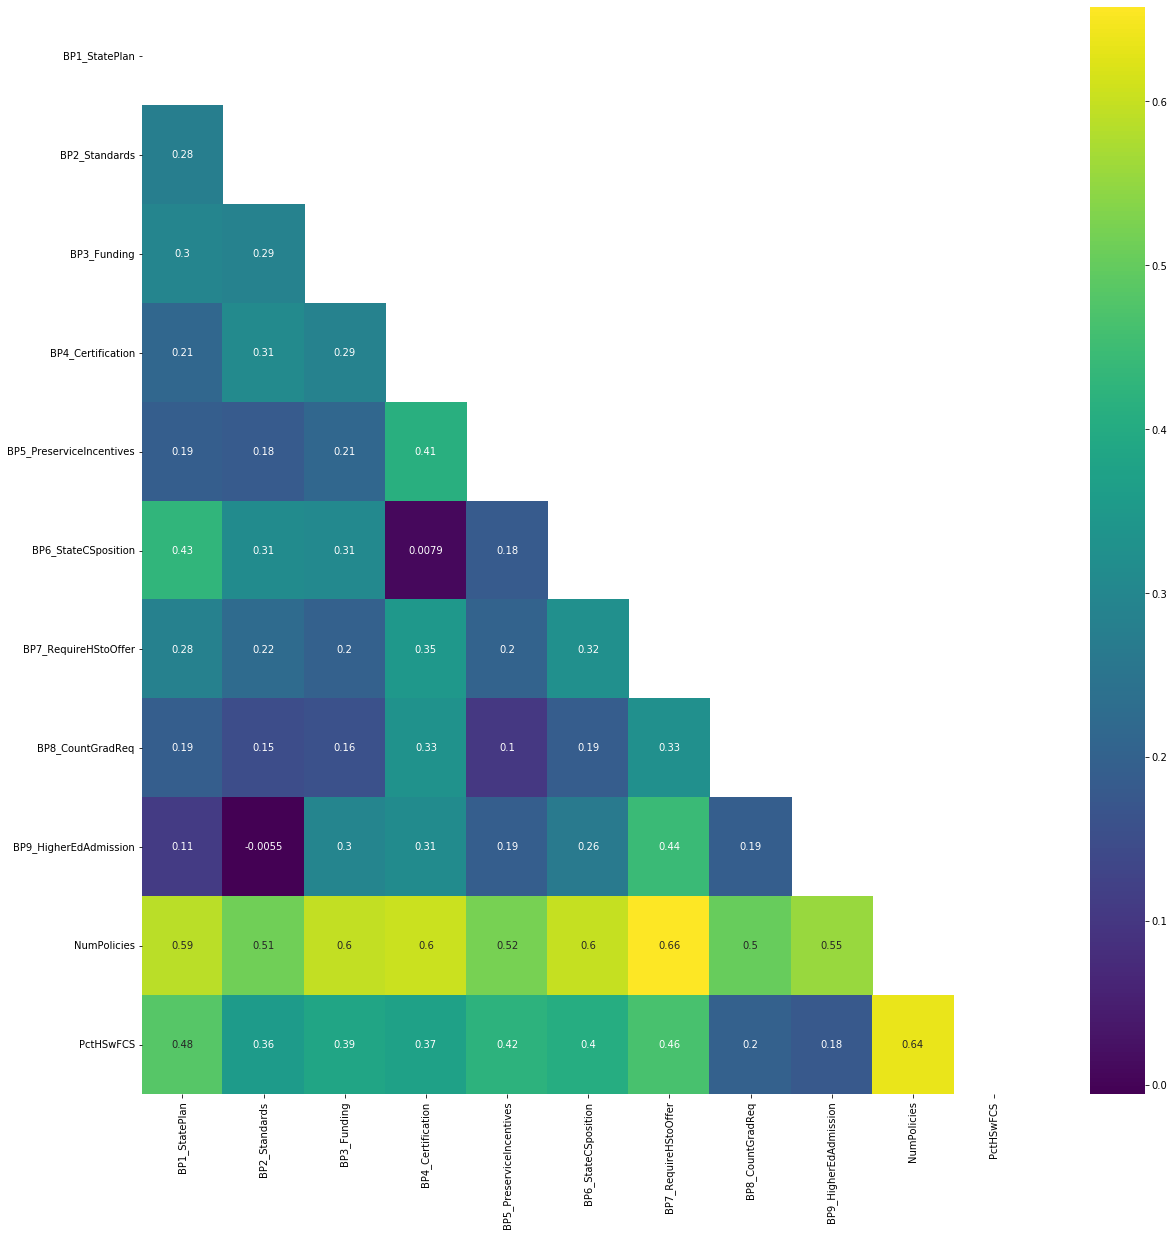

In [15]:
mask = np.zeros_like(corrWresults)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(corrWresults, mask=mask,  annot=True, cmap="viridis")


In [16]:
# Find total aggregations for Num of Policies
df['PolicyWt'] = df['TotalStudents'] * df['NumPolicies']
aggdfP = df.agg({'StateAbbv':'count','NumPolicies':'mean', 'TotalStudents':'sum', 'PolicyWt': 'sum' })
NumPolicies_StAvg = aggdfP['NumPolicies']
NumPolicies_StDev = np.std(df['NumPolicies'])
NumPolicies_WtAvg = aggdfP['PolicyWt']/aggdfP['TotalStudents']
print("# of Policies - State Average: " + str(NumPolicies_StAvg))
print("# of Policies - Standard Deviation: " + str(NumPolicies_StDev))
print("# of Policies - Student Weighted Average: " + str(NumPolicies_WtAvg))

# of Policies - State Average: 5.1568627450980395
# of Policies - Standard Deviation: 2.4202782939936425
# of Policies - Student Weighted Average: 5.480166732234398


In [17]:
# Find total aggregations for % HS with FCS
aggdf = df.agg({'StateAbbv':'count','PctHSwFCS':'mean', 'NumHSWithCS':'sum', 'NumOfHS': 'sum' })
PctHSwFCS_StAvg = aggdf['PctHSwFCS']
PctHSwFCS_StDev = np.std(df['PctHSwFCS'])
PctHSwFCS_WtAvg = aggdf['NumHSWithCS']/aggdf['NumOfHS']
print("% of HS with FCS - State Average: " + str(PctHSwFCS_StAvg))
print("% of HS with FCS - Standard Deviation: " + str(PctHSwFCS_StDev))
print("% of HS with FCS - National Average: " + str(PctHSwFCS_WtAvg))

% of HS with FCS - State Average: 0.57364578
% of HS with FCS - Standard Deviation: 0.177380010626325
% of HS with FCS - National Average: 0.5129529742459925


In [18]:
def agg_policy(policy_binary):
    aggdf = df.groupby(policy_binary).agg({'StateAbbv':'count','PctHSwFCS':'mean', 'NumOfHS':'sum', 'NumHSWithCS': 'sum' })
    row0 =  aggdf.loc[0]
    row1 =  aggdf.loc[1]
    ret_row = {'Policy': policy_binary[1:]}
    ret_row.update({'Cnt0':row0['StateAbbv'],'Cnt1':row1['StateAbbv'],'StAvg0':row0['PctHSwFCS'],'StAvg1':row1['PctHSwFCS']})
    ret_row.update({'WStAvg0': row0['NumHSWithCS'] / row0['NumOfHS'], 'WStAvg1': row1['NumHSWithCS'] / row1['NumOfHS'] })
    return ret_row
    
    

In [19]:
policy_agg = pd.DataFrame(columns=['Policy','Cnt0','Cnt1','StAvg0','StAvg1','WStAvg0','WStAvg1'])
policy_agg = pd.DataFrame()
for polB in policiesB:
    policy_agg = policy_agg.append(agg_policy(polB),ignore_index=True)
policy_agg.set_index('Policy')
policy_agg['PctImplemented'] = policy_agg['Cnt1']/(policy_agg['Cnt1'] + policy_agg['Cnt0'])
policy_agg['StAvgDiff'] = policy_agg['StAvg1'] - policy_agg['StAvg0']
policy_agg['WStAvgDiff'] = policy_agg['WStAvg1'] - policy_agg['WStAvg0']
policy_agg['StAvgDiffPct'] = policy_agg['StAvgDiff']/PctHSwFCS_StAvg
policy_agg['WStAvgDiffPct'] = policy_agg['WStAvgDiff']/PctHSwFCS_WtAvg

print (policy_agg)
                                                   

   Cnt0  Cnt1                   Policy    StAvg0    StAvg1   WStAvg0  \
0  30.0  21.0             P1_StatePlan  0.501858  0.676200  0.478736   
1  12.0  39.0             P2_Standards  0.460044  0.608600  0.434757   
2  21.0  30.0               P3_Funding  0.491928  0.630848  0.443969   
3  10.0  41.0         P4_Certification  0.439319  0.606408  0.390186   
4  30.0  21.0  P5_PreserviceIncentives  0.511114  0.662976  0.450916   
5  20.0  31.0       P6_StateCSposition  0.484255  0.631317  0.471545   
6  28.0  23.0      P7_RequireHStoOffer  0.499073  0.664430  0.469120   
7  15.0  36.0          P8_CountGradReq  0.519610  0.596161  0.458808   
8  30.0  21.0     P9_HigherEdAdmission  0.547433  0.611093  0.492720   

    WStAvg1  PctImplemented  StAvgDiff  WStAvgDiff  StAvgDiffPct  \
0  0.585871        0.411765   0.174342    0.107134      0.303919   
1  0.539515        0.764706   0.148557    0.104758      0.258969   
2  0.545312        0.588235   0.138920    0.101344      0.242170   
3  0.53

<Figure size 3600x2880 with 0 Axes>

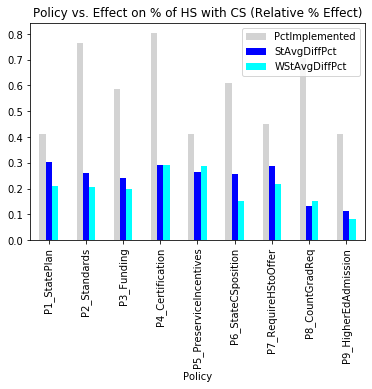

In [20]:
plt.figure(figsize=(50,40))
policy_agg_chart = policy_agg[['Policy','PctImplemented','StAvgDiffPct','WStAvgDiffPct']]
policy_agg_chart.plot(kind='bar', x='Policy', color=['lightgrey', 'blue', 'cyan'])
plt.title("Policy vs. Effect on % of HS with CS (Relative % Effect)")
plt.show()

<Figure size 3600x2880 with 0 Axes>

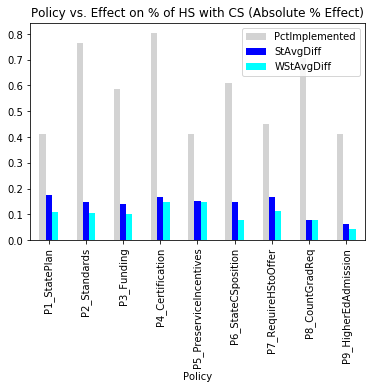

In [21]:
plt.figure(figsize=(50,40))
policy_agg_chart = policy_agg[['Policy','PctImplemented','StAvgDiff','WStAvgDiff']]
policy_agg_chart.plot(kind='bar', x='Policy', color=['lightgrey', 'blue', 'cyan'])
plt.title("Policy vs. Effect on % of HS with CS (Absolute % Effect)")
plt.show()

In [22]:
print (df[['StateName','NumPolicies','TotalStudents','PctHSwFCS','PctHSwFCS_ZScore']].sort_values('PctHSwFCS',ascending=False))

               StateName  NumPolicies  TotalStudents  PctHSwFCS  \
2               Arkansas            9         159278   0.924837   
40        South Carolina            7         241394   0.921569   
20              Maryland            9         270650   0.900826   
39          Rhode Island            6          44343   0.857143   
33                Nevada            9         161249   0.827815   
19         Massachusetts            8         327368   0.824289   
6            Connecticut            6         169150   0.818182   
1                Alabama            8         262216   0.815725   
30         New Hampshire            6          55167   0.780000   
49         West Virginia            7          79972   0.761538   
44                  Utah            7         287198   0.744745   
15               Indiana            9         342616   0.742169   
45              Virginia            7         403527   0.732759   
11                Hawaii            6          59099   0.71875